In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from matplotlib.colors import ListedColormap

In [12]:
class NS:
    def __init__(self, p, rho, L=100, T=100, max_v=5) -> None:
        self.road_length = L
        self.p = p
        self.rho = rho
        self.steps = T
        self.max_velocity = max_v
        self.road = self.initiate_road()

    def initiate_road(self):
        num_of_cars = int(self.rho * self.road_length)
        road = ([self.max_velocity] * num_of_cars) + ([-1] * (self.road_length - num_of_cars))
        random.shuffle(road)
        return road

    def get_road_slice(self, car):
        velocity = self.road[car]
        if car+velocity+1 >= self.road_length:
            part1 = self.road[int(car+1):]
            part2 = self.road[0:int((car+velocity+1)%self.road_length)]
            road_slice = [j for i in [part1, part2] for j in i]
        else:
            road_slice = self.road[int(car+1):int(car+velocity+1)]
        return road_slice  

    def adjust_speeds(self, car_indices):
        for car in car_indices:
            velocity = self.road[car]
            self.road[car] = velocity + 1 if velocity < self.max_velocity else velocity
            road_part = self.get_road_slice(car)
            next_cars = np.where(np.array(road_part) != -1)[0]
            if len(next_cars) != 0 and next_cars[0] < self.road[car]:
                self.road[car] = next_cars[0]
            if np.random.uniform() < self.p and self.road[car] > 0:
                self.road[car] -= 1

    def move_cars(self, car_indices):
        for car in car_indices:
            velocity = self.road[car]
            if velocity != 0:
                new_car_pos = car+velocity if car+velocity < self.road_length else (car+velocity)%self.road_length
                self.road[int(new_car_pos)] = velocity
                self.road[car] = -1

    def simulate(self):
        avg_velocity = np.zeros(self.steps)
        results = [self.road]
        for i in range(self.steps):
            car_inds = np.where(np.array(self.road) != -1)[0]
            self.adjust_speeds(car_inds)
            self.move_cars(car_inds)
            new_car_inds = np.where(np.array(self.road) != -1)[0]
            car_speeds = [self.road[car] for car in new_car_inds]
            avg_velocity[i] = np.mean(car_speeds)
            results = np.concatenate((results, [self.road]), axis=0)
        return np.mean(avg_velocity), results

In [14]:
def create_results(ps, rhos, L=100, T=100):
    if len(ps) != 3 or len(rhos) != 3:
        raise ValueError("Parameters lists must be of len equal to three")
    else:
        fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
        for i, p in enumerate(ps):
            for j, rho in enumerate(rhos):
                ns = NS(p, rho, L, T)
                _, result = ns.simulate()
                result[np.where(result != -1)] = 1
                new_result = np.delete(result, 0, 0)
                sns.heatmap(new_result, ax=axs[i, j], square=True, cbar=False, cmap=ListedColormap(['white', 'black']), yticklabels=False, xticklabels=False)
                axs[i, j].set_title(rf"$p={p}, \rho={rho}$")

    plt.savefig("images/system_evolution2.png")

In [8]:
def avg_velocity(ps, rhos, L=100, T=100):
    plt.figure(figsize=(13, 8))
    markers = ["+", "*", "D", 'o']
    for j, p in enumerate(ps):
        velocities = np.zeros(len(rhos))
        for i, rho in enumerate(rhos):
            ns = NS(p, rho, L=L, T=T)
            velocities[i] = ns.simulate()[0]
        plt.plot(rhos, velocities, marker=markers[j], markersize=4, label=rf"$p={p}$")

    plt.xlabel(rf"$\rho$")
    plt.ylabel("Average velocity")
    plt.title(rf"Average velocity as a function of $\rho$")
    plt.legend()
    plt.savefig("images/avg_velocity_new.png")

In [15]:
ps = [0, 0.3, 0.5, 0.7]
rhos1 = [0.1, 0.2, 0.4]
rhos2 = np.linspace(0.01, 1, 100)

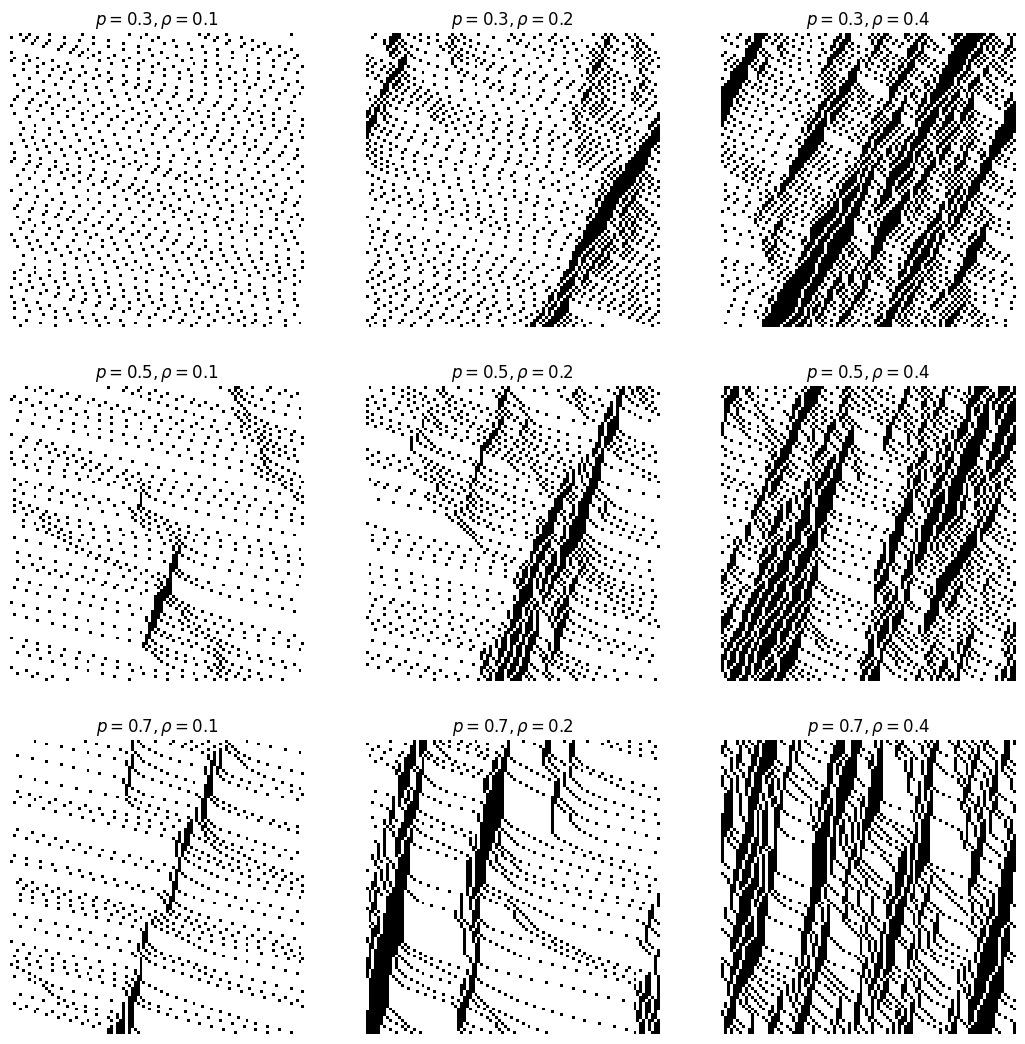

In [16]:
create_results(ps[1:], rhos1)

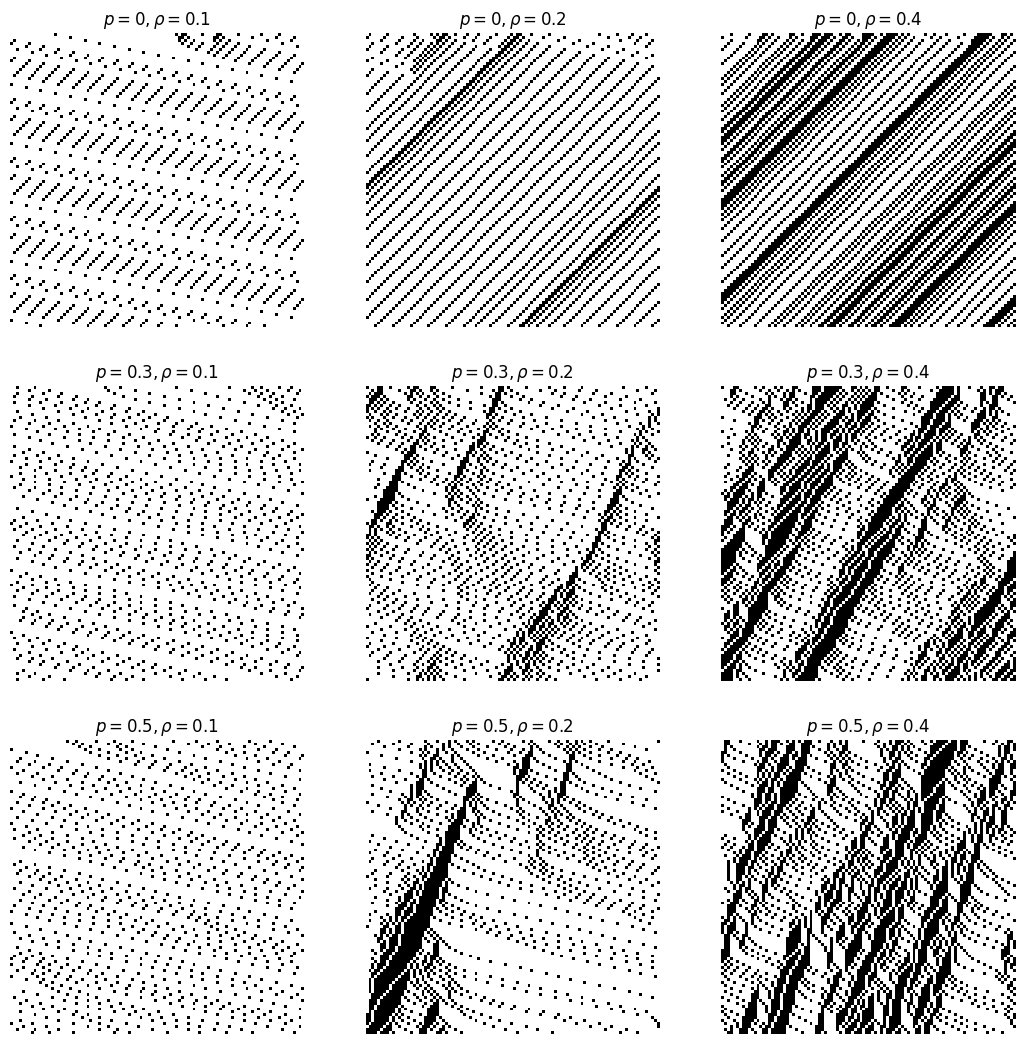

In [17]:
create_results(ps[:-1], rhos1)

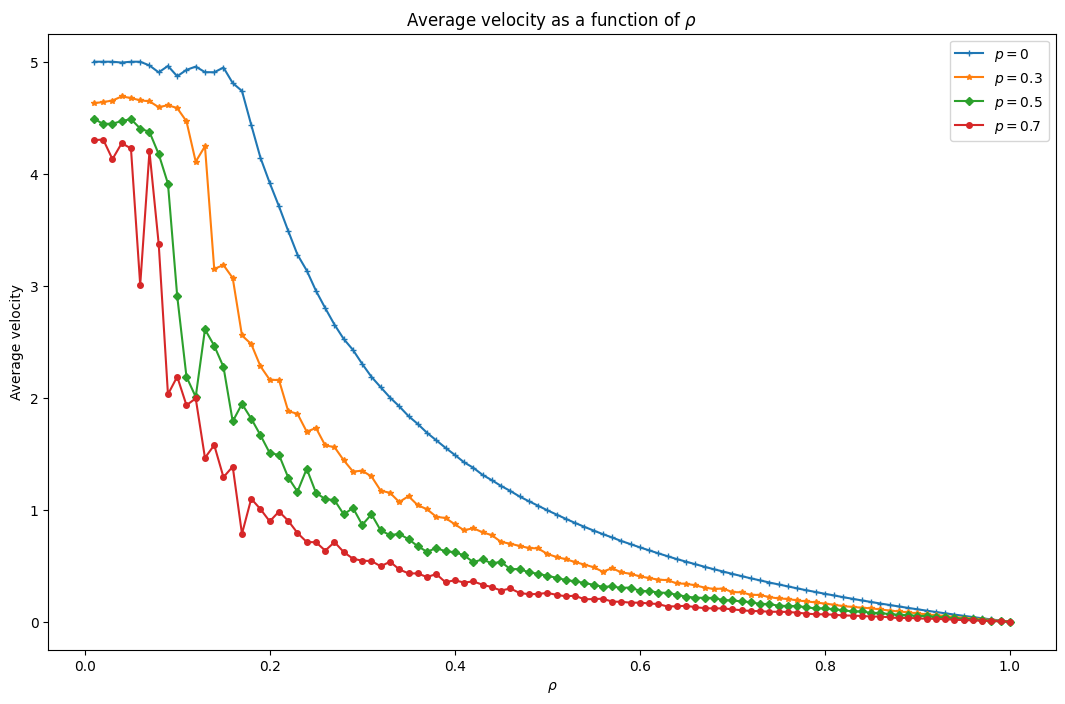

In [7]:
avg_velocity(ps, rhos2)

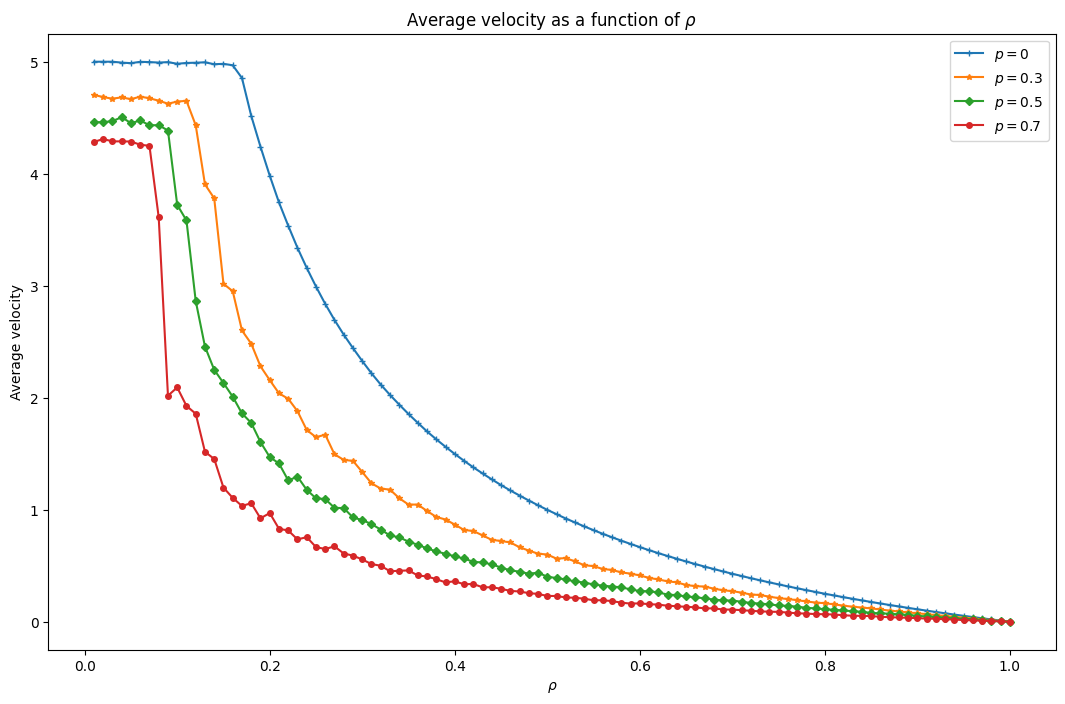

In [11]:
avg_velocity(ps, rhos2, L=100, T=500)